# Generating Models

In [17]:
from vae.dirichlet import SamplingReparamLaplace, SamplingReparamKL, DirVae
from vae.gauss import GaussVae

from keras.datasets import mnist

import numpy as np

In [3]:
def get_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    return x_train, x_test, y_train, y_test

In [4]:
x_train, x_test, y_train, y_test = get_data()

# Init Models

In [5]:
from keras import callbacks as cb

cb_earlystop = cb.EarlyStopping(
    monitor='val_loss', min_delta=1, patience=3, verbose=0, mode='auto')

models = {}

In [8]:
o_dim = 784
h_dim = 300
c_dim = 15

In [9]:
c = lambda _: [
    cb_earlystop, 
    cb.CSVLogger("./log_results/log.{}.csv".format(_))]
model_types = ["dirichlet_laplace", "dirichlet_kl", "logit", "normal"]

In [14]:
models["dirichlet_laplace"] = DirVae(
    reparam=SamplingReparamLaplace, 
    batch_size=16, 
    original_dim=o_dim, 
    encoder_widths=h_dim, 
    latent_dim=c_dim, 
    decoder_width=h_dim,
    log_alpha=True,
    dropout=True)

In [15]:
models["dirichlet_kl"] = DirVae(
    reparam=SamplingReparamLaplace, 
    batch_size=16, 
    original_dim=o_dim, 
    encoder_widths=h_dim, 
    latent_dim=c_dim, 
    decoder_width=h_dim,
    log_alpha=True,
    dropout=True)

In [16]:
models["logit"] = GaussVae(
    batch_size=16, 
    original_dim=o_dim, 
    encoder_widths=h_dim, 
    latent_dim=c_dim, 
    decoder_width=h_dim,
    logit=True)

In [21]:
models["normal"] = GaussVae(
    batch_size=16, 
    original_dim=o_dim, 
    encoder_widths=h_dim, 
    latent_dim=c_dim, 
    decoder_width=h_dim,
    logit=False)

In [23]:
model_types

['dirichlet_laplace', 'dirichlet_kl', 'logit', 'normal']

In [70]:
models[model_types[3]].fit(x_train[:16*100*3,:], x_test,
                       callbacks=c(model_types[3]), 
                       nb_epoch=30)

Train on 4800 samples, validate on 10000 samples
Epoch 1/30
4800/4800 [==============================] - 4s - loss: 120.2698 - val_loss: 122.0400
Epoch 2/30
4800/4800 [==============================] - 4s - loss: 118.0534 - val_loss: 120.3422
Epoch 3/30
4800/4800 [==============================] - 3s - loss: 116.4297 - val_loss: 119.8780
Epoch 4/30
4800/4800 [==============================] - 4s - loss: 115.2855 - val_loss: 118.6273
Epoch 5/30
4800/4800 [==============================] - 4s - loss: 114.5947 - val_loss: 117.7641
Epoch 6/30
4800/4800 [==============================] - 4s - loss: 113.6835 - val_loss: 117.8010
Epoch 7/30
4800/4800 [==============================] - 4s - loss: 112.9293 - val_loss: 117.0663
Epoch 8/30
4800/4800 [==============================] - 4s - loss: 112.4938 - val_loss: 116.9176
Epoch 9/30
4800/4800 [==============================] - 4s - loss: 111.8173 - val_loss: 116.3882
Epoch 10/30
4800/4800 [==============================] - 4s - loss: 111.3808 -

In [48]:
from vae.evaluate import MnistMetrics

%matplotlib inline

In [71]:
m = MnistMetrics(models[model_types[3]], x_test, y_test, logit=True)

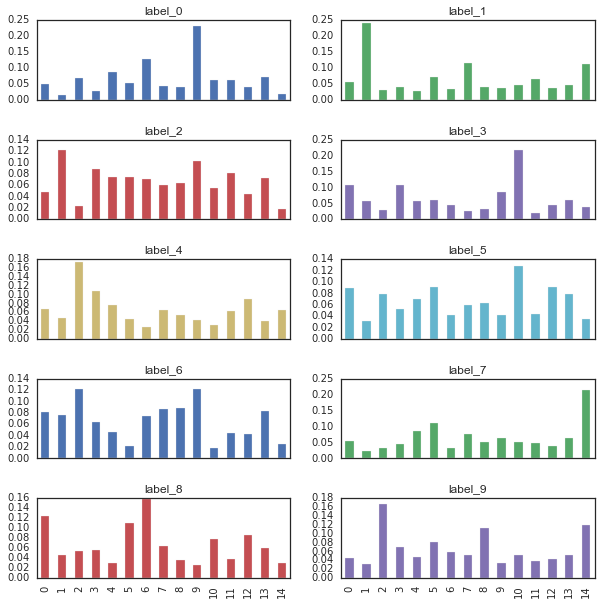

In [72]:
m.plot_bar()

# Plot Data

In [85]:
type = "dirichlet_kl"

In [89]:
m = MnistMetrics(models[type],  x_test, y_test)

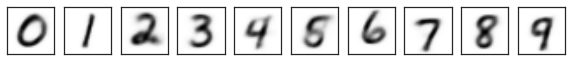

In [90]:
plt.figure(figsize=(10, 3))
m.plot_mean_digits()
plt.savefig("log_results/" + type + "digits.png")

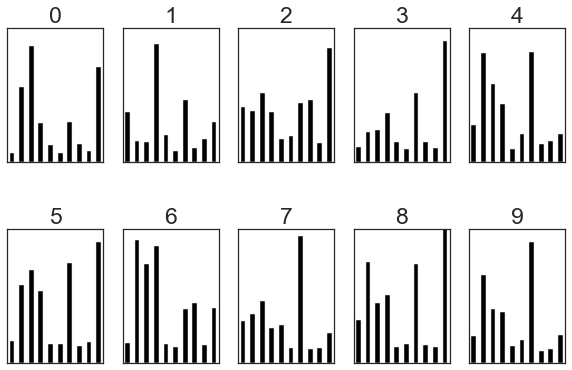

In [92]:
plot_bars(L)
plt.savefig("log_results/" + type + "bars.png")

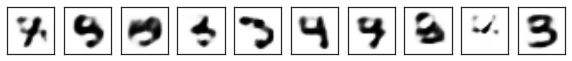

In [93]:
plt.figure(figsize=(10, 3))
m.plot_onehots()
plt.savefig("log_results/" + type + "hots.png")

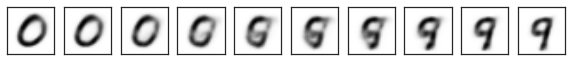

In [94]:
plt.figure(figsize=(10, 3))
m.plot_transition("label_0", "label_9")
plt.savefig("log_results/" + type + "0-9.png")

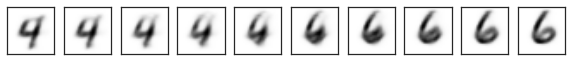

In [95]:
plt.figure(figsize=(10, 3))
m.plot_transition("label_4", "label_6")
plt.savefig("log_results/" + type + "4-6.png")

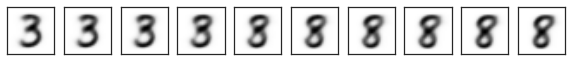

In [96]:
plt.figure(figsize=(10, 3))
m.plot_transition("label_3", "label_8")
plt.savefig("log_results/" + type + "3-8.png")